In [476]:
import numpy as np
import pandas as pd
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Read in the data UMTMVS.csv file from the Data folder**

In [477]:
df = pd.read_csv('UMTMVS.csv')

In [478]:
df.head(3)

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    325 non-null    object 
 1   UMTMVS  325 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.2+ KB


**Set the DATE column as the index.**

In [480]:
df = df.set_index('DATE')

In [481]:
df.head(5)

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [482]:
df.head(5)

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


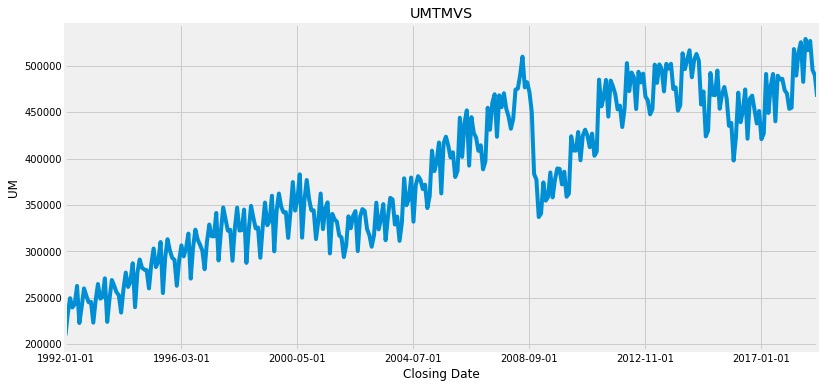

In [483]:
title='UMTMVS'
ylabel='UM'
xlabel='Closing Date'

ax = df['UMTMVS'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [484]:
((df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']) * 100

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [485]:
((df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']) * 100

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [486]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2005-01-01':'2019-03-01']['UMTMVS'].min()

337101.0

In [487]:
df.UMTMVS[df.UMTMVS == 337101.0].index.tolist()

['2009-01-01']

**What 6 months have the highest value?**

In [488]:
df.sort_values(by='UMTMVS', ascending=False).head(6)


,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0
2014-06-01,516935.0


In [489]:
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
df['Dates'] = df.index

In [491]:
df['Dates'] = pd.to_datetime(df["Dates"]) 

In [494]:
df['Years'] = pd.DatetimeIndex(df['Dates']).year

**Create a bar plot showing the average value in millions of dollars per year**

In [495]:
df.groupby(['Years'])['UMTMVS'].mean()

Years
1992    242002.000000
1993    251708.083333
1994    269842.666667
1995    289973.083333
1996    299765.666667
1997    319558.250000
1998    324984.416667
1999    335990.583333
2000    350715.333333
2001    330874.916667
2002    326226.916667
2003    334615.666667
2004    359080.833333
2005    395173.083333
2006    417962.666667
2007    443288.083333
2008    455749.500000
2009    368648.250000
2010    409273.083333
2011    457657.833333
2012    474727.333333
2013    484145.416667
2014    490629.916667
2015    459918.333333
2016    446224.500000
2017    467076.333333
2018    499964.166667
2019    466791.000000
Name: UMTMVS, dtype: float64

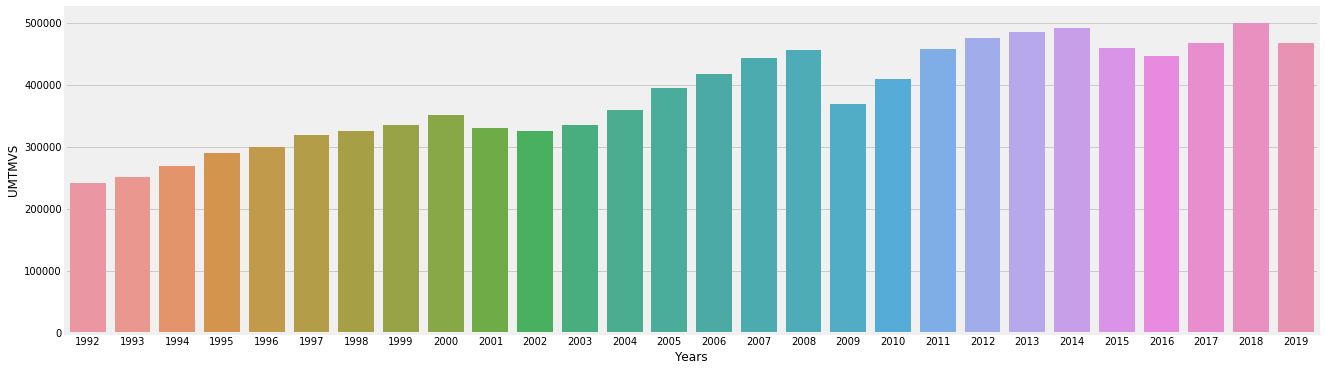

In [496]:
plt.figure(figsize=(20,6))
sns.barplot(x="Years", y="UMTMVS", data=df,ci=None)

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**



In [497]:
yeadiff= df.groupby(['Years'])['UMTMVS'].mean().reset_index()

In [498]:
yeadiff

,Years,UMTMVS
0,1992,242002.000000
1,1993,251708.083333
2,1994,269842.666667
3,1995,289973.083333
4,1996,299765.666667
5,1997,319558.250000
6,1998,324984.416667
7,1999,335990.583333
8,2000,350715.333333
9,2001,330874.916667


In [499]:
yeadifference = yeadiff.set_index('Years').diff().reset_index()
yeadifference

,Years,UMTMVS
0,1992,NaN
1,1993,9706.083333
2,1994,18134.583333
3,1995,20130.416667
4,1996,9792.583333
5,1997,19792.583333
6,1998,5426.166667
7,1999,11006.166667
8,2000,14724.750000
9,2001,-19840.416667


**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

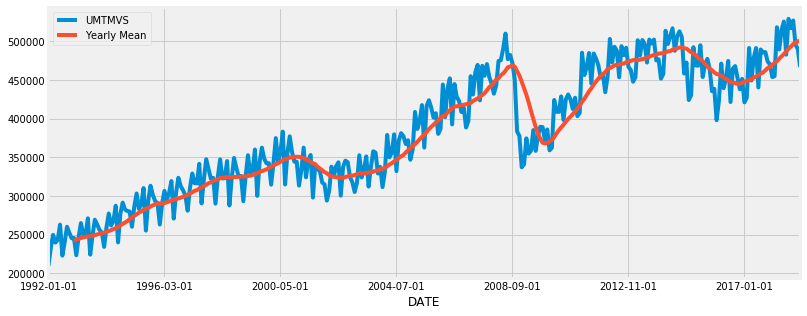

In [500]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [501]:
df.head()

,UMTMVS,Dates,year,Years,Yearly Mean
DATE,,,,,
1992-01-01,209438.0,1992-01-01,1992,1992,NaN
1992-02-01,232679.0,1992-02-01,1992,1992,NaN
1992-03-01,249673.0,1992-03-01,1992,1992,NaN
1992-04-01,239666.0,1992-04-01,1992,1992,NaN
1992-05-01,243231.0,1992-05-01,1992,1992,NaN


In [502]:
df2008 = df[df['Years']== 2008]

In [503]:
value = df2008['UMTMVS'].max()

In [504]:
date1 = df.loc[df['UMTMVS'] == value]
date1['Dates']

DATE
2008-06-01   2008-06-01
Name: Dates, dtype: datetime64[ns]

In [505]:
dfMax2008 = df[df['Years']>= 2009]

In [506]:
dfMax = dfMax2008[dfMax2008['UMTMVS']>= value]

In [507]:
date2 = dfMax.sort_values(by='Years', ascending=True).head(1)
date2

,UMTMVS,Dates,year,Years,Yearly Mean
DATE,,,,,
2014-03-01,513700.0,2014-03-01,2014,2014,485847.666667


In [537]:
len(df.loc['2008-06-01':'2014-03-01'])

70